In [15]:
import os

from library import cliBot, Logmsg
from pathlib import Path
from IPython.core.display import Image
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition

envPath = Path().cwd().parent.joinpath("sample.env")
load_dotenv(override=True, dotenv_path=envPath)



True

## Configuring Memory

In [6]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

config = {"configurable": {"thread_id": "1"}}

In [7]:
model = os.getenv("GPT_MODEL")
llm = ChatOpenAI(model=model)
tools = []
llm_with_tools = llm.bind_tools(tools)


class BotState(MessagesState):
    chat_summary: str

def assistant(state: BotState):
    return {"messages": llm_with_tools.invoke(state["messages"])}

In [8]:
from langchain_core.messages import RemoveMessage, SystemMessage
#when to summarize or not
from typing import Literal


def summarize_conversation(state: BotState):
    summary = state.get("chat_summary", "")
    system_msg =(
        f"Previously summarized conversation:\n{summary}"
        "update the previous summary using latest conversation."
    )
    all_msg = [SystemMessage(content=system_msg)] + state["messages"]

    response = llm.invoke(all_msg)
    new_summary = response.content

    # Always update
    state["chat_summary"] = new_summary

    # Delete old messages, keep last 2
    delete_messages = [ RemoveMessage(id=m.id)for m in state["messages"][:-2] ]
    Logmsg(new_summary)

    return {
        "chat_summary": new_summary,
        "messages": delete_messages
    }


def do_summarize(state: BotState) -> Literal["summarize_conversation", END]:
    msglen = len(state["messages"])
    Logmsg(f"Chat Len : {msglen}".format(msglen=msglen))
    if msglen >= 6:
        return "summarize_conversation"
    return END

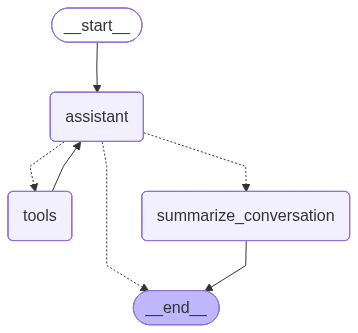

In [9]:
g = StateGraph(BotState)
#### NODES
g.add_node(assistant)
g.add_node("tools", ToolNode(tools=tools))
g.add_node(summarize_conversation)

#### EDGES
g.add_edge(START, "assistant")
g.add_conditional_edges("assistant", tools_condition)
g.add_edge("tools", "assistant")
g.add_conditional_edges("assistant", do_summarize)
g.add_edge("assistant", END)
g.add_edge("summarize_conversation", END)

graph = g.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
import sys

try:
    cliBot(graphInstance=graph, config=config, show_all_msg=False)
except KeyboardInterrupt as ki:
    print("User choose to exit", file=sys.stderr)
except Exception as e:
    print(e)

Question:
 You are Alex

I am Vijay
Assistant:

Hello, Vijay! How can I assist you today?


Chat Len : 2


Question:
 I am Ai agentic developer. I help comapnies/person to  convert their workflow to Agentic Workflow
Assistant:

That sounds interesting, Vijay! Converting workflows to an agentic framework can greatly enhance efficiency and adaptability. How can I assist you in your role as an agentic workflow developer? Are you looking for specific information, tools, or resources?


Chat Len : 4
Chat Len : 6


Question:
 How can RAG help me the the process
Assistant:

RAG, or Retrieval-Augmented Generation, can be highly beneficial in the context of agentic workflow development. Here’s how it can assist you:

1. **Enhanced Information Retrieval**: RAG models can retrieve relevant information from a large corpus of documents in real time, ensuring that the workflows you develop are informed by the most current and relevant data.

2. **Contextual Understanding**: By combining retrieval with generation, RAG can help you generate responses or suggestions that are context-aware. This is particularly useful in dynamic workflows where context can change frequently.

3. **Automation of Repetitive Tasks**: You can use RAG to automate the retrieval of standard operating procedures, guidelines, or best practices relevant to specific tasks within the workflow, thus saving time and reducing manual effort.

4. **Personalized Workflows**: RAG can tailor responses based on user input or historical data, all

RAG, or Retrieval-Augmented Generation, can be highly beneficial in the context of agentic workflow development. Here’s how it can assist you:

1. **Enhanced Information Retrieval**: RAG models retrieve relevant information from large document corpora in real time, ensuring your workflows are informed by the most current and pertinent data.

2. **Contextual Understanding**: By combining retrieval with generation, RAG can generate responses or suggestions that are context-aware, which is especially useful for dynamic workflows where context can shift frequently.

3. **Automation of Repetitive Tasks**: You can use RAG to automate the retrieval of standard operating procedures, guidelines, or best practices relevant to specific tasks in the workflow, leading to time savings and decreased manual effort.

4. **Personalized Workflows**: RAG can tailor responses based on user input or historical data, allowing you to craft more personalized workflows that cater to specific user or team needs.

Question:
 what should be the idle size of chunks for rag and overlapping chunks
Assistant:

When considering the ideal size of chunks and the use of overlapping chunks for Retrieval-Augmented Generation (RAG), there are several factors to take into account:

### Ideal Chunk Size
1. **General Guideline**:
   - A common recommendation for chunk size is around **100 to 400 words**. This size is manageable for retrieval models to handle while still providing enough context for generation tasks.

2. **Contextual Relevance**:
   - It's vital to ensure that each chunk preserves contextual relevance. Too small chunks may lose important context, while too large chunks can become unwieldy and difficult for models to effectively parse.

3. **Data Type**:
   - Depending on the type of documents or information you're working with (e.g., articles, technical documents, FAQs), you may need to adjust the chunk size to reflect the natural breaks in content (like paragraphs or sections).

### Overlappin

Chat Len : 4
Chat Len : 6


Question:
 what are the encryption mechnism
Assistant:

Encryption mechanisms are essential for securing data by converting it into a coded format that is unreadable without a decryption key. Here are the main types of encryption mechanisms:

### 1. **Symmetric Encryption**
   - **Definition**: Uses the same key for both encryption and decryption.
   - **Examples**: 
     - **AES (Advanced Encryption Standard)**: A widely used symmetric encryption standard.
     - **DES (Data Encryption Standard)**: An older standard, now considered outdated due to its short key length.
     - **3DES (Triple DES)**: Applies DES three times for better security.
   - **Use Cases**: Bulk data encryption, such as encrypting files or database fields.

### 2. **Asymmetric Encryption**
   - **Definition**: Uses a pair of keys—public and private keys. The public key is used for encryption, and the private key is used for decryption.
   - **Examples**:
     - **RSA (Rivest-Shamir-Adleman)**: A widely used algor

Encryption mechanisms are essential for securing data by converting it into a coded format that is unintelligible without a decryption key. Here are the main types of encryption mechanisms:

### 1. **Symmetric Encryption**
   - **Definition**: Uses the same key for both encryption and decryption.
   - **Examples**: 
     - **AES (Advanced Encryption Standard)**: A widely used symmetric encryption standard.
     - **DES (Data Encryption Standard)**: An older standard, now considered outdated due to its short key length.
     - **3DES (Triple DES)**: Applies DES three times for enhanced security.
   - **Use Cases**: Bulk data encryption, such as encrypting files or database content.

### 2. **Asymmetric Encryption**
   - **Definition**: Utilizes a pair of keys—public and private. The public key is used for encryption, and the private key is used for decryption.
   - **Examples**:
     - **RSA (Rivest-Shamir-Adleman)**: A common algorithm based on the difficulty of factoring large integer

In [14]:
graph.get_state(config=config).values.get("chat_summary", "BLANK")

"Encryption mechanisms are essential for securing data by converting it into a coded format that is unintelligible without a decryption key. Here are the main types of encryption mechanisms:\n\n### 1. **Symmetric Encryption**\n   - **Definition**: Uses the same key for both encryption and decryption.\n   - **Examples**: \n     - **AES (Advanced Encryption Standard)**: A widely used symmetric encryption standard.\n     - **DES (Data Encryption Standard)**: An older standard, now considered outdated due to its short key length.\n     - **3DES (Triple DES)**: Applies DES three times for enhanced security.\n   - **Use Cases**: Bulk data encryption, such as encrypting files or database content.\n\n### 2. **Asymmetric Encryption**\n   - **Definition**: Utilizes a pair of keys—public and private. The public key is used for encryption, and the private key is used for decryption.\n   - **Examples**:\n     - **RSA (Rivest-Shamir-Adleman)**: A common algorithm based on the difficulty of factoring